# Parquet and GeoParquet

**Apachece Parquet** or just Parquet is an open-source, column-oriented file format that makes it faster to retrieve data and uses less memory space for tabular data, than CSV.

It is very popular for big data reposiotrues

The geospatial version of parquet for storing vector data is the **GeoParquet**.

This format comes from the necessity to have an efficient and standardized format to store big geospatial data efficiently. 

Introduced in December 2022.

## Catalog search

Import all necessary libraries.

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pystac_client
import planetary_computer

import contextily as ctx # for adding basemaps

We use the 2020 US Census Collection id `us-census` to look for the data in the MPC catalog. 

This collection has each tabular file as an item:

In [10]:
# open MPC catalog
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

#search for census collection
search = catalog.search(collections=['us-census'])

In [11]:
items = {item.id : item for item in search.items()}

In [14]:
item = items['2020-cb_2020_us_county_500k']
item

id: 2020-cb_2020_us_county_500k
"bbox: [-179.148909, -14.548699, 179.77847, 71.365162]"
datetime: 2021-08-01T00:00:00Z
proj:epsg: 4269
"table:columns: [{'name': 'STATEFP', 'type': 'byte_array', 'description': 'State FIPS Code'}, {'name': 'COUNTYFP', 'type': 'byte_array', 'description': 'County FIPS code'}, {'name': 'COUNTYNS', 'type': 'byte_array'}, {'name': 'AFFGEOID', 'type': 'byte_array', 'description': 'American FactFinder summary level code + geovariant code + ""00US"" + GEOID'}, {'name': 'GEOID', 'type': 'byte_array', 'description': 'Concatenation of State FIPS and county FIPS code'}, {'name': 'NAME', 'type': 'byte_array', 'description': 'County name'}, {'name': 'NAMELSAD', 'type': 'byte_array', 'description': 'Name and Legal/statistical description'}, {'name': 'STUSPS', 'type': 'byte_array', 'description': 'FIPS State Postal Code'}, {'name': 'STATE_NAME', 'type': 'byte_array'}, {'name': 'LSAD', 'type': 'byte_array', 'description': 'Legal/statistical classification'}, {'name': 'ALAND', 'type': 'int64', 'description': 'Current land area'}, {'name': 'AWATER', 'type': 'int64', 'description': 'Current water area'}, {'name': 'geometry', 'type': 'byte_array', 'description': 'coordinates for County polygons'}]"
table:row_count: 3234
https://stac-extensions.github.io/table/v1.2.0/schema.json
https://stac-extensions.github.io/projection/v1.0.0/schema.json
href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root


Notice each item has a single asset 'data'. This contains the URL to the GeoParquet file holding the information. Let's access the item's asset:

In [16]:
asset = item.assets['data']

In [17]:
asset

href: abfs://us-census/2020/cb_2020_us_county_500k.parquet
type: application/x-parquet
title: Dataset root
roles: ['data']
owner: 2020-cb_2020_us_county_500k
"table:storage_options: {'account_name': 'ai4edataeuwest', 'credential': 'st=2023-12-03T21%3A26%3A59Z&se=2023-12-11T21%3A27%3A00Z&sp=rl&sv=2021-06-08&sr=c&skoid=c85c15d6-d1ae-42d4-af60-e2ca0f81359b&sktid=72f988bf-86f1-41af-91ab-2d7cd011db47&skt=2023-12-04T21%3A26%3A58Z&ske=2023-12-11T21%3A26%3A58Z&sks=b&skv=2021-06-08&sig=BLArhSdmPPo1AI5v0l/a5r4kTK9f4%2BICDWptcUupQrQ%3D'}"


## Opening (Geo)Parquet

To open the parquet file we use the `gpd.read_parquet()` function using the asset's URL poiniting to the data:

In [18]:
counties = gpd.read_parquet(asset.href, 
                            storage_options=asset.extra_fields['table:storage_options'])

In [21]:
counties.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,21,141,00516917,0500000US21141,21141,Logan,Logan County,KY,Kentucky,06,1430224002,12479211,"POLYGON ((-87.06037 36.68085, -87.06002 36.708..."
1,36,081,00974139,0500000US36081,36081,Queens,Queens County,NY,New York,06,281594050,188444349,"POLYGON ((-73.96262 40.73903, -73.96243 40.739..."
2,34,017,00882278,0500000US34017,34017,Hudson,Hudson County,NJ,New Jersey,06,119640822,41836491,"MULTIPOLYGON (((-74.04220 40.69997, -74.03900 ..."


In [22]:
type(counties)

geopandas.geodataframe.GeoDataFrame

## Contextily 
This is a Python library to add basemaps.

Retrieves tile maps from the internet and makes it possible to plot them alongside our vector data. 

**Example**

We want to plot the Santa Barbara county polygon together with a basemap.

In [23]:
sb = counties[counties.NAME == 'Santa Barbara']
sb

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,STATE_NAME,LSAD,ALAND,AWATER,geometry
1222,06,083,00277306,0500000US06083,06083,Santa Barbara,Santa Barbara County,CA,California,06,7080860393,2729213352,"MULTIPOLYGON (((-119.04704 33.48382, -119.0384..."


<Axes: >

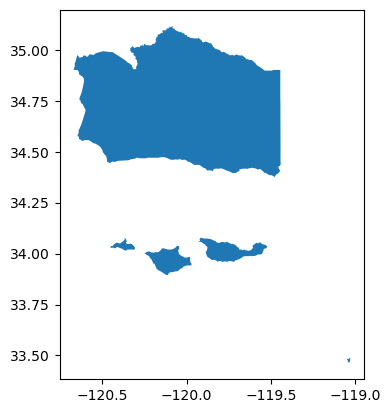

In [24]:
sb.plot()

Contextily's tiles can be reprojected to match the CRS of our vector data, but...
... it can be easier to reproject your vector to EPSG 3857 instead. 

The CRS EPSG 3857 is a projected CRS sued for rendering maps online. For example in Google Maps or OpenStreet maps.

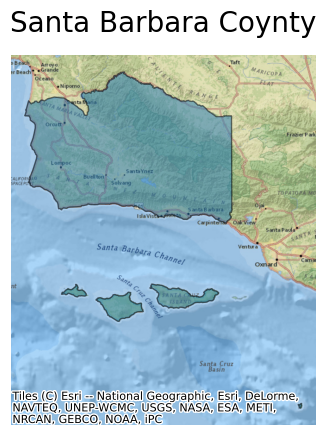

In [30]:
fig, ax = plt.subplots()

(sb.to_crs(epsg=3857)
 .plot(ax=ax, figsize=(7,7), alpha=0.5, edgecolor='k')
)

# add basemap
ctx.add_basemap(ax, source=ctx.providers.Esri.NatGeoWorldMap)

ax.set_title('Santa Barbara Coynty', fontdict={'fontsize':'20'})
ax.set_axis_off()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f2a05e4eb60>

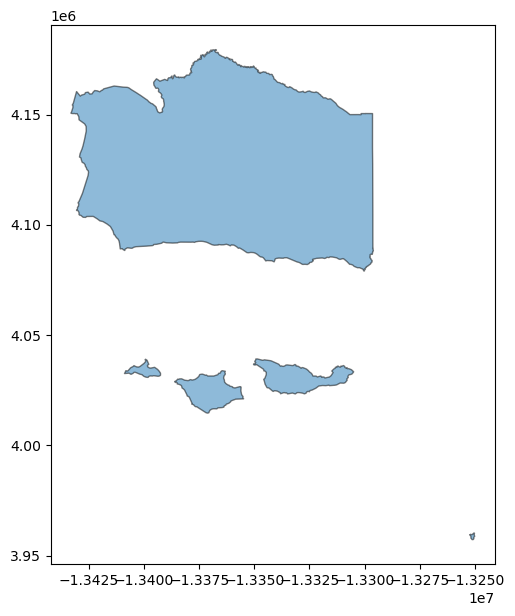

In [29]:
# create axis with plot
ax = (sb.to_crs(epsg=3857)
      .plot(figsize=(7, 7), alpha=0.5, edgecolor="k")
      )

# add basemap from contextily
ctx.add_basemap(ax)

# update axes
ax.set_title("Santa Barbara County", fontdict={"fontsize": "20"})
ax.set_axis_off()